In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
eismo_ivykiai = pd.read_csv('ei_2021_12_31.csv')
eismo_ivykiai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23707 entries, 0 to 23706
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    23707 non-null  int64  
 1   registrokodas                 23707 non-null  object 
 2   dataLaikas                    23707 non-null  object 
 3   registravimoData              23707 non-null  object 
 4   paskutinioRedagavimoLaikas    23707 non-null  object 
 5   iskaitinis                    23707 non-null  int64  
 6   rusis                         23707 non-null  object 
 7   schema1                       23707 non-null  object 
 8   schema2                       23707 non-null  object 
 9   dalyviuSkaicius               23707 non-null  int64  
 10  zuvusiuSkaicius               23707 non-null  int64  
 11  zuvVaiku                      23707 non-null  int64  
 12  suzeistuSkaicius              23707 non-null  int64  
 13  s

In [7]:
null_reiksmiu_skaicius = eismo_ivykiai.isnull().sum()
null_reiksmiu_skaicius

Unnamed: 0                          0
registrokodas                       0
dataLaikas                          0
registravimoData                    0
paskutinioRedagavimoLaikas          0
iskaitinis                          0
rusis                               0
schema1                             0
schema2                             0
dalyviuSkaicius                     0
zuvusiuSkaicius                     0
zuvVaiku                            0
suzeistuSkaicius                    0
suzeistaVaiku                       0
tpSkaicius                          0
policijosTpSkaicius             23604
apgadintuTpSkaicius               749
apgadintuPolicijosTpSkaicius    23625
policijosIstaigaL1                  0
policijosIstaigaL2              22735
iforminusiIstaigaL1              4815
iforminusiIstaigaL2             17816
ivykioVieta                         0
vietosSavivaldybeTipas            134
savivaldybe                         0
gatve                            6482
namas       

In [ ]:
eismo_ivykiai = eismo_ivykiai.drop(columns=['paskutinioRedagavimoLaikas', 'policijosTpSkaicius'])

In [15]:
# TIK 2021 METŲ DUOMENYS
eismo_ivykiai['dataLaikas'] = pd.to_datetime(eismo_ivykiai['dataLaikas'])
eismo_ivykiai_2021 = eismo_ivykiai[eismo_ivykiai['dataLaikas'].dt.year == 2021]

In [18]:
eismo_ivykiai_2021 = eismo_ivykiai[eismo_ivykiai['dataLaikas'].dt.year == 2021].copy()

In [19]:
# EISMO RŪŠIŲ BENDRI SKAIČIAI
ivykiu_rusiu_pasiskirstymas = eismo_ivykiai_2021['rusis'].value_counts()
ivykiu_rusiu_pasiskirstymas

rusis
Susidūrimas                                     5538
Užvažiavimas ant gyvūno                         5080
Kiti eismo įvykiai                              4466
Susidūrimas su stovinčia transporto priemone    4466
Užvažiavimas ant kliūties                       1890
Užvažiavimas ant pėsčiojo                        752
Apvirtimas                                       724
Susidūrimas su dviračiu                          543
Susidūrimas su motociklu                         118
Susidūrimas su mopedu                             46
Susidūrimas su bėgine transporto priemone         15
Name: count, dtype: int64

In [20]:
# ĮVYKIŲ SKAIČIUS KIEKVIENĄ MĖNESĮ
eismo_ivykiai_2021['menesis'] = eismo_ivykiai_2021['dataLaikas'].dt.month

menesine_ivykiu_tendencija = eismo_ivykiai_2021.groupby('menesis').size()
menesine_ivykiu_tendencija

menesis
1     1736
2     1510
3     1606
4     1614
5     2166
6     2200
7     2042
8     2080
9     1965
10    2199
11    2192
12    2328
dtype: int64

In [110]:
apgadintu_tp_skaicius = int(eismo_ivykiai['apgadintuTpSkaicius'].sum())
print(f"Apgadintų transporto priemonių skaičius 2021 m.: {apgadintu_tp_skaicius}")

Apgadintų transporto priemonių skaičius 2021 m.: 28857


In [144]:
eismo_ivykiai_2021['zuvusiuSkaicius'].max()

5

In [111]:
# SUŽEISTI IR ŽUVĘ SUAUGUSIEJI
suzeistu_skaicius = eismo_ivykiai_2021['suzeistuSkaicius'].sum()
zuvusiu_skaicius = eismo_ivykiai_2021['zuvusiuSkaicius'].sum()

print(f"Sužeistų asmenų skaičius 2021 m.: {suzeistu_skaicius}")
print(f"Žuvusių asmenų skaičius 2021 m.: {zuvusiu_skaicius}")

Sužeistų asmenų skaičius 2021 m.: 3173
Žuvusių asmenų skaičius 2021 m.: 147


In [148]:
zuvusiam_tenka_suzeistuju = round(suzeistu_skaicius / zuvusiu_skaicius)
zuvusiam_tenka_suzeistuju

22

In [74]:
# SUŽEISTI IR ŽUVĘ VAIKAI
suzeistu_vaiku_skaicius = eismo_ivykiai_2021['suzeistaVaiku'].sum()
zuvusiu_vaiku_skaicius = eismo_ivykiai_2021['zuvVaiku'].sum()

print(f"Sužeistų vaikų skaičius 2021 m.: {suzeistu_vaiku_skaicius}")
print(f"Žuvusių vaikų skaičius 2021 m.: {zuvusiu_vaiku_skaicius}")

Sužeistų vaikų skaičius 2021 m.: 554
Žuvusių vaikų skaičius 2021 m.: 8


In [150]:
bendras_nukentejusiu_vaiku_skaicius = suzeistu_vaiku_skaicius + zuvusiu_vaiku_skaicius

suzeistu_vaiku_procentas = (suzeistu_vaiku_skaicius / bendras_nukentejusiu_vaiku_skaicius) * 100
zuvusiu_vaiku_procentas = (zuvusiu_vaiku_skaicius / bendras_nukentejusiu_vaiku_skaicius) * 100

print(f"Sužeistų vaikų procentas iš visų nukentėjusių vaikų 2021 m.: {suzeistu_vaiku_procentas:.2f}%")
print(f"Žuvusių vaikų procentas iš visų nukentėjusių vaikų 2021 m.: {zuvusiu_vaiku_procentas:.2f}%")

Sužeistų vaikų procentas iš visų nukentėjusių vaikų 2021 m.: 98.58%
Žuvusių vaikų procentas iš visų nukentėjusių vaikų 2021 m.: 1.42%


In [112]:
# EISMO IVYKIAI, KURIUOSE DALYVAVO NEBLAIVŪS VAIRUOTOJAI
girtu_vairuotoju_ivykiai = eismo_ivykiai_2021[(eismo_ivykiai_2021['neblaivusKaltininkai'] == 'Taip') |
                                              (eismo_ivykiai_2021['apsvaigeKaltininkai'] == 'Taip') |
                                              (eismo_ivykiai_2021['atsisakeTikrintisKaltininkai'] == 'Taip')].shape[0]

print(f"2021 m. eismo įvykiai, kuriuose dalyvavo neblaivūs vairuotojai: {girtu_vairuotoju_ivykiai}")

2021 m. eismo įvykiai, kuriuose dalyvavo neblaivūs vairuotojai: 1269


In [72]:
# SUŽEISTI IR ŽUVĘ ASMENYS ĮVYKIUOSE DALYVAUJANT NEBLAIVIEMS VAIRUOTOJAMS
suzeisti_girtu_vairuotoju_ivykiuose = eismo_ivykiai_2021[(eismo_ivykiai_2021['neblaivusKaltininkai'] == 'Taip') |
                                                         (eismo_ivykiai_2021['apsvaigeKaltininkai'] == 'Taip') |
                                                         (eismo_ivykiai_2021['atsisakeTikrintisKaltininkai'] == 'Taip')]['suzeistuSkaicius'].sum()

zuvusieji_girtu_vairuotoju_ivykiuose = eismo_ivykiai_2021[(eismo_ivykiai_2021['neblaivusKaltininkai'] == 'Taip') |
                                                          (eismo_ivykiai_2021['apsvaigeKaltininkai'] == 'Taip') |
                                                          (eismo_ivykiai_2021['atsisakeTikrintisKaltininkai'] == 'Taip')]['zuvusiuSkaicius'].sum()

print(f"2021 m. sužeistų asmenų skaičius įvykiuose su neblaiviais vairuotojais: {suzeisti_girtu_vairuotoju_ivykiuose}")
print(f"2021 m. žuvusių asmenų skaičius įvykiuose su neblaiviais vairuotojais: {zuvusieji_girtu_vairuotoju_ivykiuose}")

2021 m. sužeistų asmenų skaičius įvykiuose su neblaiviais vairuotojais: 227
2021 m. žuvusių asmenų skaičius įvykiuose su neblaiviais vairuotojais: 26


In [27]:
# METEOROLOGINĖS SĄLYGOS ĮVYKUS EISMO ĮVYKIUI
ivykiu_skaicius_pagal_meteo = eismo_ivykiai_2021['meteoSalygos'].value_counts()
ivykiu_skaicius_pagal_meteo

meteoSalygos
Giedra            12951
Apsiniaukę         7092
Lietus             1831
Sniegas, kruša     1064
Rūkas               327
Lijundra            222
Pūga                 83
Stiprus vėjas        68
Name: count, dtype: int64

In [28]:
# EISMO ĮVYKIAI PAGAL PAROS LAIKA
ivykiu_skaicius_pagal_paros_laika = eismo_ivykiai_2021['parosMetas'].value_counts()
ivykiu_skaicius_pagal_paros_laika

parosMetas
Diena                 14735
Tamsus paros metas     6594
Sutemos                2309
Name: count, dtype: int64

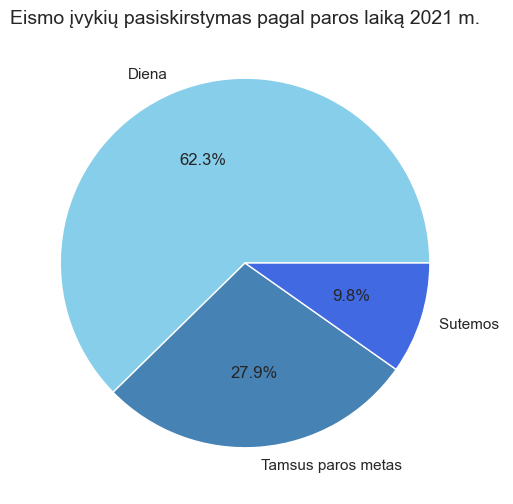

In [151]:
# VIZUALIZACIJOS

labels = ivykiu_skaicius_pagal_paros_laika.index
sizes = ivykiu_skaicius_pagal_paros_laika.values

plt.figure(figsize = (6,6))
plt.pie(sizes, labels = labels, colors = ['skyblue','steelblue','royalblue'], autopct = '%1.1f%%')
plt.title('Eismo įvykių pasiskirstymas pagal paros laiką 2021 m.', fontsize=14)

plt.show()

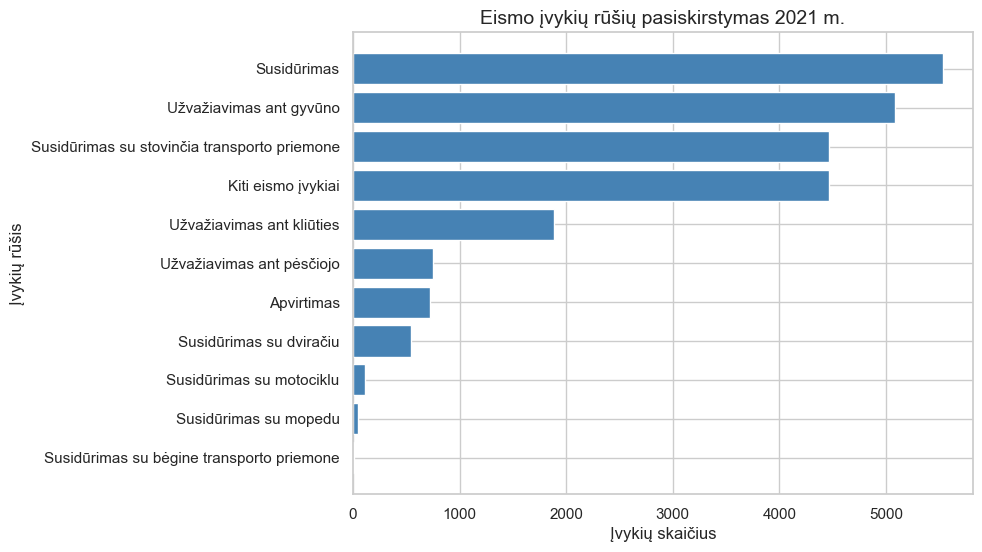

In [152]:
# VIZUALIZACIJOS

ivykiu_rusiu_skaicius_sorted = eismo_ivykiai_2021['rusis'].value_counts().sort_values(ascending=True)

plt.figure(figsize = (8,6))
plt.barh(ivykiu_rusiu_skaicius_sorted.index, ivykiu_rusiu_skaicius_sorted.values, color = 'steelblue')

plt.title('Eismo įvykių rūšių pasiskirstymas 2021 m.', fontsize=14)
plt.xlabel('Įvykių skaičius')
plt.ylabel('Įvykių rūšis')

plt.show()

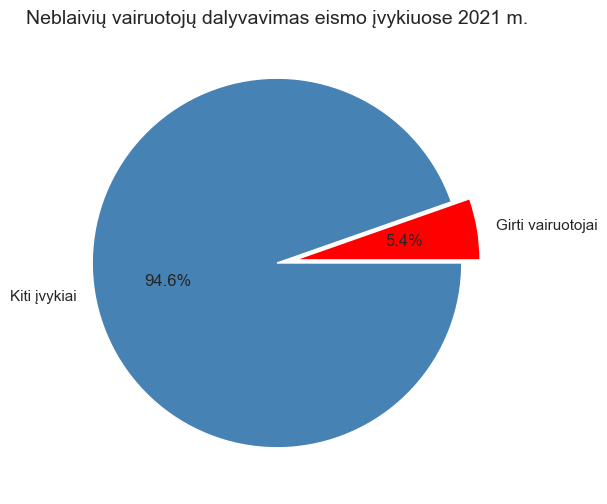

In [153]:
# VIZUALIZACIJOS

girtu_vairuotoju_ivykiai_data = eismo_ivykiai_2021[(eismo_ivykiai_2021['neblaivusKaltininkai'] == 'Taip') | 
                                                   (eismo_ivykiai_2021['apsvaigeKaltininkai'] == 'Taip') | 
                                                   (eismo_ivykiai_2021['atsisakeTikrintisKaltininkai'] == 'Taip')]

sizes = [girtu_vairuotoju_ivykiai_data.shape[0], eismo_ivykiai_2021.shape[0] - girtu_vairuotoju_ivykiai_data.shape[0]]
explode = (0.1, 0)
labels = 'Girti vairuotojai', 'Kiti įvykiai'

plt.figure(figsize = (6,6))
plt.pie(sizes, explode = explode, labels = labels, colors = ['red', 'steelblue'], autopct = '%1.1f%%')
plt.title('Neblaivių vairuotojų dalyvavimas eismo įvykiuose 2021 m.', fontsize=14)

plt.show()

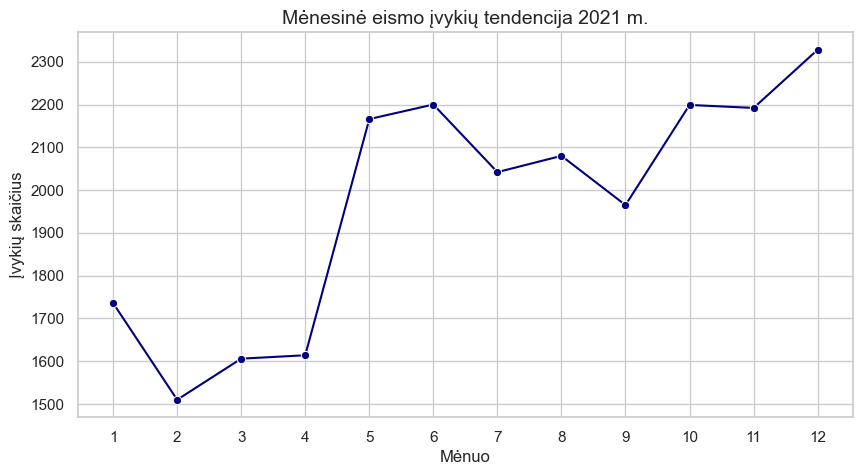

In [154]:
# VIZUALIZACIJOS

eismo_ivykiai_2021['menesis'] = eismo_ivykiai_2021['dataLaikas'].dt.month
menesine_tendencija_data = eismo_ivykiai_2021.groupby('menesis').size()

plt.figure(figsize = (10,5))
menesine_tendencija_plot = sns.lineplot(data = menesine_tendencija_data, marker = 'o', color = 'navy')

plt.title('Mėnesinė eismo įvykių tendencija 2021 m.', fontsize=14)
plt.xlabel('Mėnuo')
plt.ylabel('Įvykių skaičius')
plt.xticks(range(1, 13))

plt.show()

In [135]:
eismo_ivykiai_2021['visi_suzeistieji'] = eismo_ivykiai_2021['suzeistuSkaicius'] + eismo_ivykiai_2021['suzeistaVaiku']

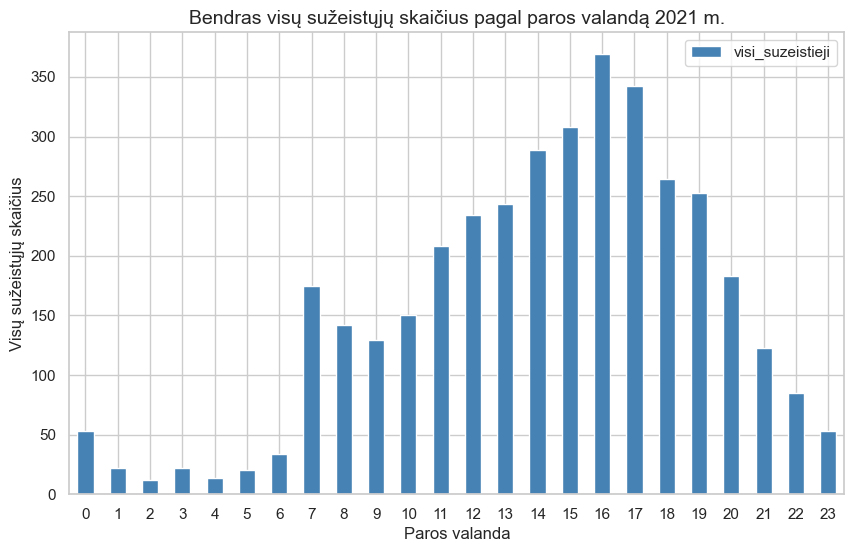

In [155]:
# VIZUALIZACIJOS

valandine_suma_visu_suzeistuju = eismo_ivykiai_2021.groupby('valanda')['visi_suzeistieji'].sum().reset_index()

valandine_suma_visu_suzeistuju.plot.bar(x = 'valanda', y = 'visi_suzeistieji', figsize = (10,6), color = 'steelblue')

plt.title('Bendras visų sužeistųjų skaičius pagal paros valandą 2021 m.', fontsize=14)
plt.xlabel('Paros valanda')
plt.ylabel('Visų sužeistųjų skaičius')
plt.xticks(rotation=0)

plt.show()

In [140]:
eismo_ivykiai_2021['visi_zuvusieji'] = eismo_ivykiai_2021['zuvusiuSkaicius'] + eismo_ivykiai_2021['zuvVaiku']

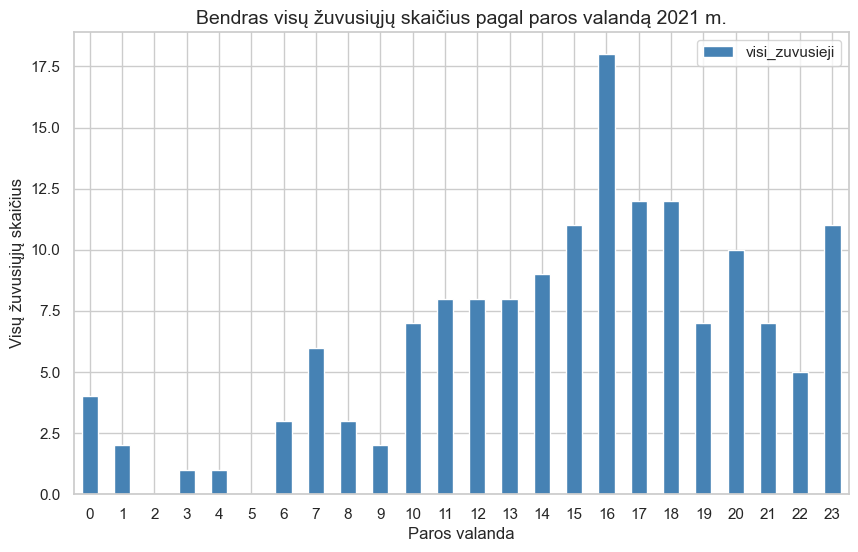

In [156]:
# VIZUALIZACIJOS

valandine_suma_visu_zuvusiuju = eismo_ivykiai_2021.groupby('valanda')['visi_zuvusieji'].sum().reset_index()

valandine_suma_visu_zuvusiuju.plot.bar(x = 'valanda', y = 'visi_zuvusieji', figsize = (10,6), color = 'steelblue')

plt.title('Bendras visų žuvusiųjų skaičius pagal paros valandą 2021 m.', fontsize=14)
plt.xlabel('Paros valanda')
plt.ylabel('Visų žuvusiųjų skaičius')
plt.xticks(rotation=0)

plt.show()

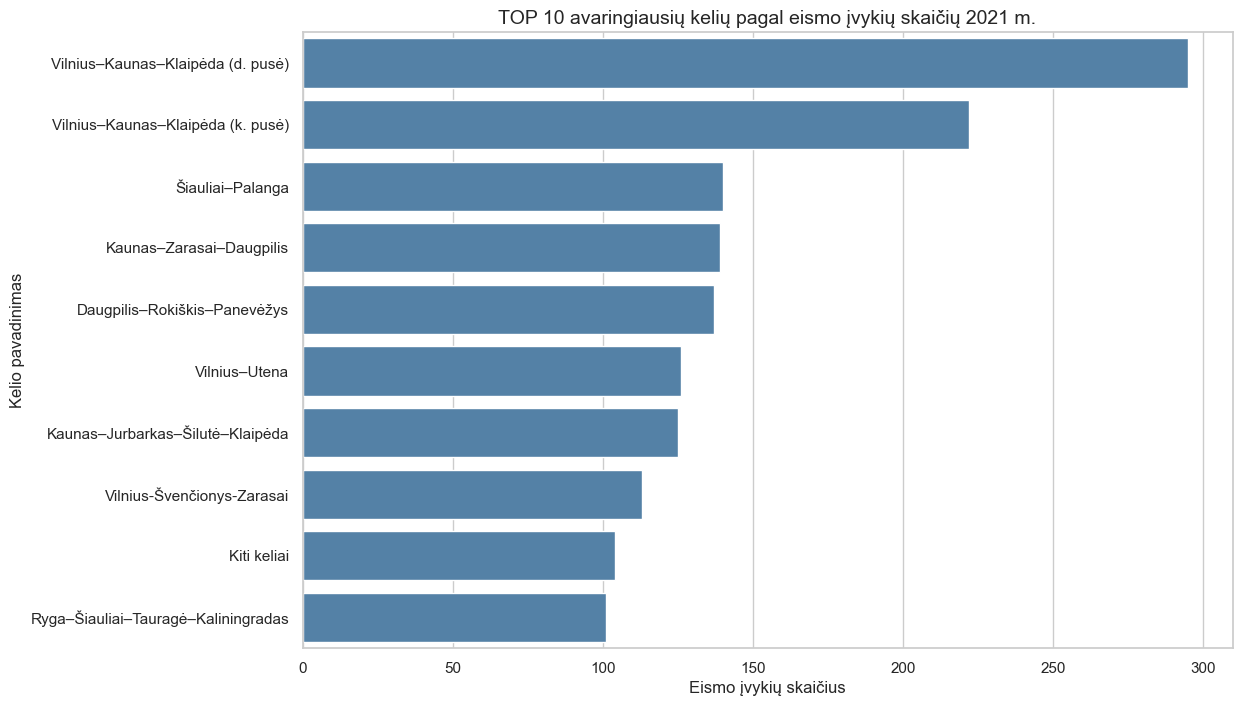

In [158]:
# VIZUALIZACIJOS

kelio_ivykiu_skaicius = eismo_ivykiai_2021['kelioPavadinimas'].value_counts().head(10)

plt.figure(figsize = (12,8))
sns.barplot(x = kelio_ivykiu_skaicius.values, y = kelio_ivykiu_skaicius.index, color = 'steelblue')
plt.title('TOP 10 avaringiausių kelių pagal eismo įvykių skaičių 2021 m.', fontsize=14)
plt.xlabel('Eismo įvykių skaičius')
plt.ylabel('Kelio pavadinimas')

plt.show()

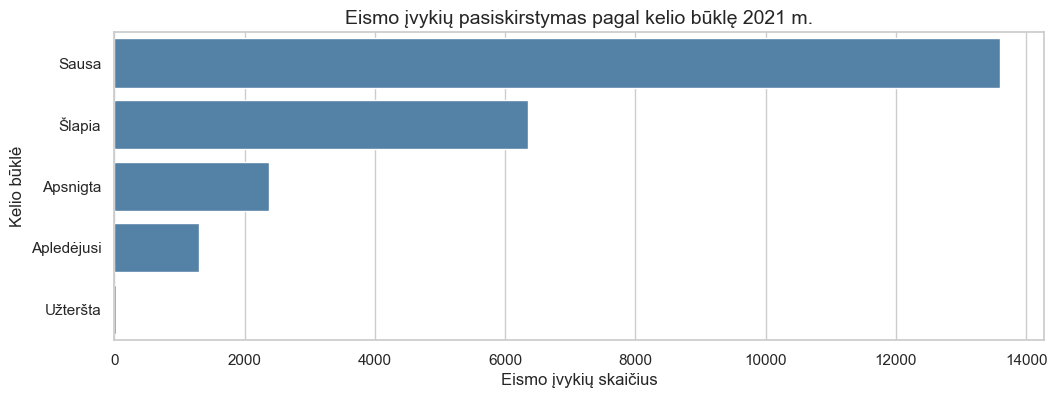

In [159]:
# VIZUALIZACIJOS

kelio_bukles_ivykiu_skaicius = eismo_ivykiai_2021['dangosBukle'].value_counts()

plt.figure(figsize = (12,4))
sns.barplot(x = kelio_bukles_ivykiu_skaicius.values, y = kelio_bukles_ivykiu_skaicius.index, color = 'steelblue')
plt.title('Eismo įvykių pasiskirstymas pagal kelio būklę 2021 m.', fontsize=14)
plt.xlabel('Eismo įvykių skaičius')
plt.ylabel('Kelio būklė')

plt.show()

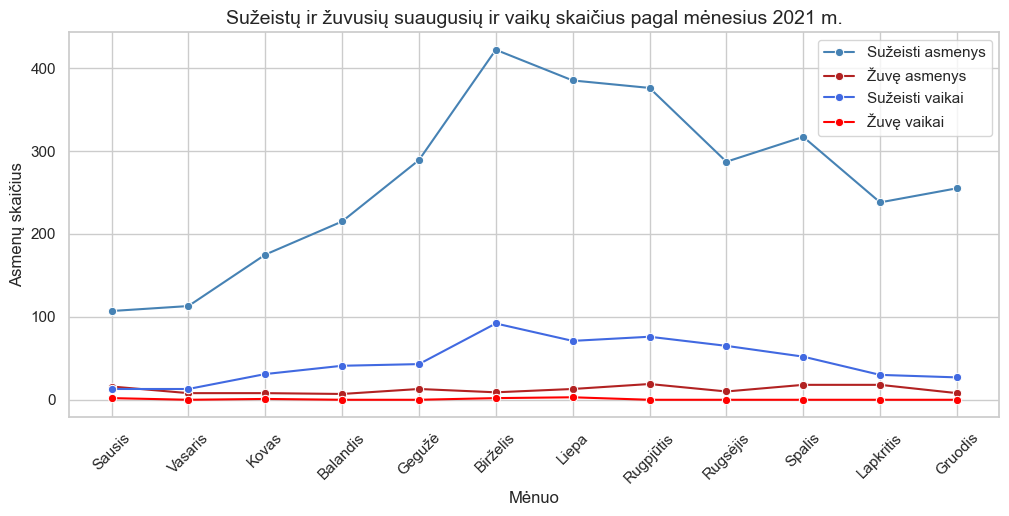

In [160]:
# VIZUALIZACIJOS

suzeistu_zuvusiu_menese_vaikai = eismo_ivykiai.groupby('menesis').agg({
    'suzeistuSkaicius':'sum', 
    'zuvusiuSkaicius':'sum',
    'suzeistaVaiku': 'sum',
    'zuvVaiku': 'sum'
}).reset_index()

plt.figure(figsize = (12,5))

sns.lineplot(x = 'menesis', y = 'suzeistuSkaicius', data = suzeistu_zuvusiu_menese_vaikai, marker ='o', label = 'Sužeisti asmenys', color = 'steelblue')
sns.lineplot(x = 'menesis', y = 'zuvusiuSkaicius', data = suzeistu_zuvusiu_menese_vaikai, marker ='o', label = 'Žuvę asmenys', color = 'firebrick')
sns.lineplot(x = 'menesis', y = 'suzeistaVaiku', data = suzeistu_zuvusiu_menese_vaikai, marker ='o', label = 'Sužeisti vaikai', color = 'royalblue')
sns.lineplot(x = 'menesis', y = 'zuvVaiku', data = suzeistu_zuvusiu_menese_vaikai, marker ='o', label = 'Žuvę vaikai', color = 'red')

plt.title('Sužeistų ir žuvusių suaugusių ir vaikų skaičius pagal mėnesius 2021 m.', fontsize=14)
plt.xlabel('Mėnuo')
plt.ylabel('Asmenų skaičius')
plt.xticks(range(1, 13), ['Sausis', 'Vasaris', 'Kovas', 'Balandis', 'Gegužė', 'Birželis', 'Liepa', 'Rugpjūtis', 'Rugsėjis', 'Spalis', 'Lapkritis', 'Gruodis'], rotation=45)
plt.legend()

plt.show()

In [ ]:
# IŠVADOS
"""
- Dažniausiais eismo įvykis - susidūrimas (5538 kartai).
- Daugiausiai eismo įvykių - gruodį (2328 įvykiai), matyt dėl švenčių, važiavimo pirkti dovanų, artimųjų lankymo, ir
  žiemiškų orų sąlygų.
- Daugiausiai sužeistų asmenų būna vasaros mėnesiais (birželis, liepa, rugpjūtis), mažiausiai - sausį ir vasarį.
- Kuo geresnis oras (sausa, giedra, vasara), tuo daugiau įvykių, nes tuo metu ir judėjimas pats didžiausias.
- Girti vairuotojai dalyvavo 5,4 % visų eismo įvykių.
- Kelias Vilnius-Kaunas-Klaipėda pats avaringiausias, nes matyt pats užimčiausias, jungia didžiausius miestus.
- 16-17 h daugiausiai sužeistųjų ir žuvusiųjų, matyt tuo metu po darbų padidėja srautas, 
  savaime padaugėja ir eismo įvykių.
- Balandį - gegužę grafike "Mėnesinė eismo įvykių tendencija 2021 m." jungia labai ryškus eismo įvykių skaičiaus
  šuolis - po žiemos į gatves išvažiuoja "vasariniai" (ne itin įgudę) vairuotojai.
"""